# Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn import linear_model

In [2]:
df = pd.read_csv('data-airbnbsg.csv')

In [3]:
df

,id,host_id,host_since,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,area,region,smart_location,...,scores_location,scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,total_price
0,56334,266763,2010-10-20,NaN,0,2,2,Woodlands,North Region,Singapore,...,8.0,9.0,0,flexible,2,0,2,0,0.21,69.0
1,71609,367042,2011-01-29,100.0,0,9,9,Tampines,East Region,Singapore,...,8.0,8.0,1,moderate,9,0,9,0,0.13,260.0
2,71896,367042,2011-01-29,100.0,0,9,9,Tampines,East Region,Singapore,...,8.0,8.0,1,moderate,9,0,9,0,0.21,136.0
3,71903,367042,2011-01-29,100.0,0,9,9,Tampines,East Region,Singapore,...,9.0,9.0,0,moderate,9,0,9,0,0.34,145.0
4,71907,367042,2011-01-29,100.0,0,9,9,Tampines,East Region,Singapore,...,8.0,8.0,1,strict_14_with_grace_period,9,0,9,0,0.24,275.0
5,151547,729617,2011-06-22,NaN,0,2,2,Orchard,Central Region,Singapore,...,10.0,9.0,0,strict_14_with_grace_period,1,0,1,0,0.16,120.0
6,275343,1439258,2011-11-24,86.0,0,34,34,Bukit Merah,Central Region,Singapore,...,9.0,9.0,1,strict_14_with_grace_period,34,1,32,1,0.24,40.0
7,289234,367042,2011-01-29,100.0,0,9,9,Tampines,East Region,Singapore,...,9.0,9.0,1,moderate,9,0,9,0,0.14,456.0
8,294281,1521514,2011-12-20,65.0,0,6,6,Newton,Central Region,Singapore,...,9.0,9.0,0,moderate,6,0,6,0,1.37,80.0
9,301247,1552002,2011-12-31,87.0,0,1,1,Geylang,Central Region,Singapore,...,10.0,9.0,0,moderate,1,0,1,0,1.34,40.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6894 entries, 0 to 6893
Data columns (total 57 columns):
id                                              6894 non-null int64
host_id                                         6894 non-null int64
host_since                                      6894 non-null object
host_response_rate                              5779 non-null float64
host_is_superhost                               6894 non-null int64
host_listings_count                             6894 non-null int64
host_total_listings_count                       6894 non-null int64
area                                            6894 non-null object
region                                          6894 non-null object
smart_location                                  6894 non-null object
country_code                                    6894 non-null object
latitude                                        6894 non-null float64
longitude                                       6894 non-null float6

In [5]:
df.describe()

,id,host_id,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,scores_communication,scores_location,scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,total_price
count,6.894000e+03,6.894000e+03,5779.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6891.000000,...,4320.000000,4312.000000,4312.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,4444.000000,6894.000000
mean,2.234428e+07,8.820428e+07,92.142585,0.131129,37.704091,37.704091,1.314600,103.850758,3.495068,1.526411,...,9.458796,9.316558,8.990028,0.559182,34.454308,27.402089,5.992022,1.060197,1.105092,167.461706
std,9.370953e+06,7.946114e+07,17.290178,0.337565,53.968494,53.968494,0.028937,0.042932,2.429846,1.334927,...,1.060856,0.957566,1.188807,0.496521,50.283610,50.439855,16.016288,5.083918,1.287008,229.795308
min,5.633400e+04,5.949800e+04,0.000000,0.000000,0.000000,0.000000,1.243910,103.646560,1.000000,0.000000,...,2.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,14.000000
25%,1.565965e+07,2.050515e+07,93.000000,0.000000,2.000000,2.000000,1.297655,103.838232,2.000000,1.000000,...,9.000000,9.000000,9.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.210000,79.000000
50%,2.392711e+07,5.627346e+07,100.000000,0.000000,11.000000,11.000000,1.311560,103.851575,3.000000,1.000000,...,10.000000,10.000000,9.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.610000,140.000000
75%,3.032278e+07,1.547777e+08,100.000000,0.000000,61.000000,61.000000,1.321722,103.877320,5.000000,2.000000,...,10.000000,10.000000,10.000000,1.000000,44.000000,26.000000,3.000000,0.000000,1.520000,225.000000
max,3.500137e+07,2.636943e+08,100.000000,1.000000,294.000000,294.000000,1.461460,103.973420,16.000000,50.000000,...,10.000000,10.000000,10.000000,1.000000,248.000000,248.000000,96.000000,42.000000,11.890000,10101.000000


In [6]:
df.total_price

0        69.0
1       260.0
2       136.0
3       145.0
4       275.0
5       120.0
6        40.0
7       456.0
8        80.0
9        40.0
10      161.0
11       48.0
12       76.0
13       76.0
14      145.0
15       52.0
16      274.0
17       46.0
18       74.0
19      207.0
20      165.0
21      165.0
22       59.0
23      205.0
24       65.0
25       46.0
26      165.0
27      128.0
28      301.0
29      141.0
        ...  
6864    229.0
6865    101.0
6866    105.0
6867     39.0
6868    160.0
6869    130.0
6870    135.0
6871    130.0
6872    228.0
6873    137.0
6874    176.0
6875    137.0
6876    167.0
6877    135.0
6878    125.0
6879     50.0
6880    105.0
6881    105.0
6882    199.0
6883    321.0
6884     21.0
6885     34.0
6886    128.0
6887    150.0
6888     65.0
6889    170.0
6890    193.0
6891    119.0
6892     44.0
6893    148.0
Name: total_price, Length: 6894, dtype: float64

In [7]:
df.corr()

,id,host_id,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,scores_communication,scores_location,scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,total_price
id,1.000000,0.533277,-0.025573,-0.033263,0.252701,0.252701,-0.086153,0.038782,0.163626,0.029849,...,-0.042290,0.041889,-0.027079,0.308877,0.234834,0.241647,-0.017148,-0.020788,0.184047,0.069415
host_id,0.533277,1.000000,-0.069051,-0.105209,-0.052580,-0.052580,-0.019375,0.015549,0.114180,0.037524,...,-0.030009,0.022332,-0.025918,0.165136,-0.091258,-0.050108,-0.126798,-0.006005,0.148475,0.052121
host_response_rate,-0.025573,-0.069051,1.000000,0.167259,0.099469,0.099469,-0.116465,0.005601,0.001521,0.043335,...,0.108226,0.064970,0.049066,0.055210,0.083640,0.034766,0.123012,0.073734,0.140168,-0.021558
host_is_superhost,-0.033263,-0.105209,0.167259,1.000000,0.070216,0.070216,-0.049436,0.022667,0.000789,-0.062915,...,0.188296,0.117384,0.176774,-0.019475,0.069472,0.114808,-0.118007,-0.080174,0.224880,0.044166
host_listings_count,0.252701,-0.052580,0.099469,0.070216,1.000000,1.000000,-0.116332,0.083209,0.177276,0.016678,...,-0.130769,-0.087048,-0.104788,0.115413,0.968726,0.906329,0.160734,0.082926,-0.182737,0.084474
host_total_listings_count,0.252701,-0.052580,0.099469,0.070216,1.000000,1.000000,-0.116332,0.083209,0.177276,0.016678,...,-0.130769,-0.087048,-0.104788,0.115413,0.968726,0.906329,0.160734,0.082926,-0.182737,0.084474
latitude,-0.086153,-0.019375,-0.116465,-0.049436,-0.116332,-0.116332,1.000000,-0.041982,-0.061855,-0.079387,...,-0.030322,-0.211590,0.000180,-0.107411,-0.094542,-0.050376,-0.107396,-0.096948,-0.041851,-0.118869
longitude,0.038782,0.015549,0.005601,0.022667,0.083209,0.083209,-0.041982,1.000000,0.095007,0.024882,...,0.026685,-0.020295,0.036595,0.053227,0.113553,0.097670,0.035588,0.041982,0.116863,-0.020735
accommodates,0.163626,0.114180,0.001521,0.000789,0.177276,0.177276,-0.061855,0.095007,1.000000,0.332490,...,-0.059080,-0.066308,-0.073552,0.101550,0.193028,0.236319,-0.162728,0.077211,0.115958,0.354580
bathrooms,0.029849,0.037524,0.043335,-0.062915,0.016678,0.016678,-0.079387,0.024882,0.332490,1.000000,...,-0.003167,-0.002218,-0.022570,0.078220,0.027595,-0.014461,0.088219,0.138518,0.016913,0.102124


In [8]:
column_to_drop = []
for element in df.columns:
    if 'txt' in element:
        column_to_drop.append(element[:-4])
df.drop(column_to_drop, axis=1, inplace=True)

In [9]:
len(df.columns)

57

# Choose the appropriate columns

In [10]:
columnFix = ['id',  'host_id', 'host_response_rate', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'scores_rating', 'scores_accuracy', 'scores_cleanliness', 'scores_checkin', 'scores_communication', 'scores_location', 'scores_value', 'reviews_per_month', 'total_price']

In [11]:
df = df[columnFix]

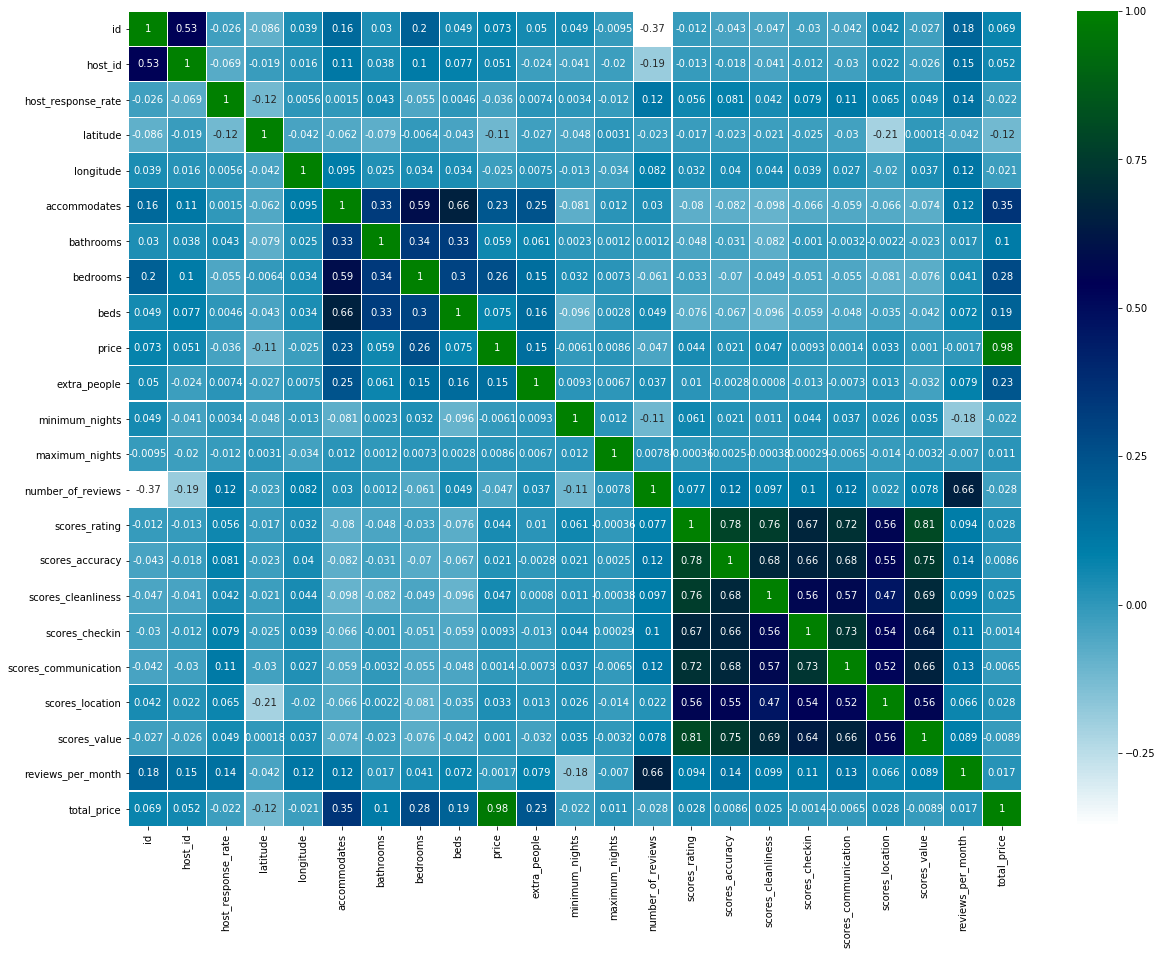

In [12]:
figure = plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), cmap ='ocean_r', linewidth = 0.1, annot=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6894 entries, 0 to 6893
Data columns (total 23 columns):
id                      6894 non-null int64
host_id                 6894 non-null int64
host_response_rate      5779 non-null float64
latitude                6894 non-null float64
longitude               6894 non-null float64
accommodates            6894 non-null int64
bathrooms               6891 non-null float64
bedrooms                6894 non-null float64
beds                    6881 non-null float64
price                   6894 non-null float64
extra_people            6894 non-null float64
minimum_nights          6894 non-null int64
maximum_nights          6894 non-null int64
number_of_reviews       6894 non-null int64
scores_rating           4323 non-null float64
scores_accuracy         4319 non-null float64
scores_cleanliness      4322 non-null float64
scores_checkin          4314 non-null float64
scores_communication    4320 non-null float64
scores_location         4312 no

In [14]:
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis=1, keys = ['Total','Percent'])
missing_data

,Total,Percent
scores_value,2582,37.452858
scores_location,2582,37.452858
scores_checkin,2580,37.423847
scores_accuracy,2575,37.351320
scores_communication,2574,37.336815
scores_cleanliness,2572,37.307804
scores_rating,2571,37.293299
reviews_per_month,2450,35.538149
host_response_rate,1115,16.173484
beds,13,0.188570


In [15]:
df = df.dropna(subset = ['beds'])

# Looking for the NaN Values

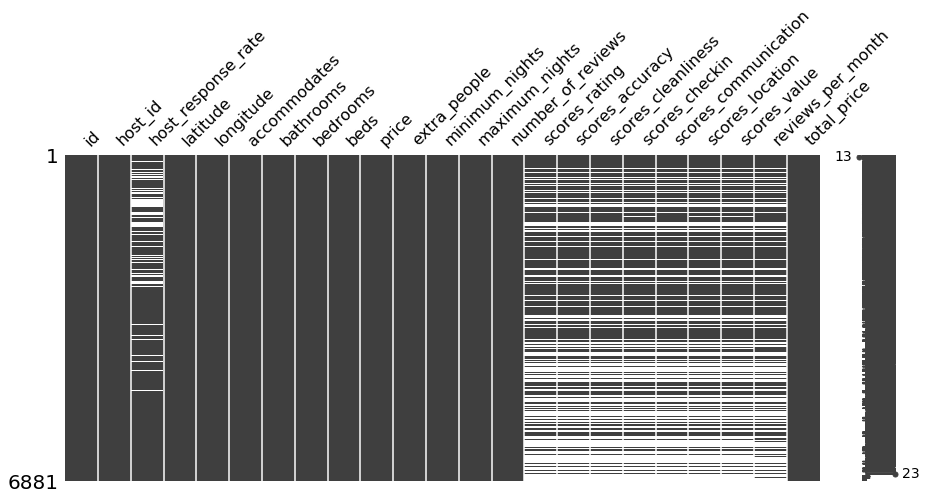

In [16]:
mno.matrix(df, figsize = (15, 6))

In [17]:
# df_null = ['scores_value', 'scores_location', 'scores_checkin', 'scores_accuracy', 
#               'scores_communication', 'scores_cleanliness', 'scores_rating', 'reviews_per_month', 
#               'host_response_rate']
# df_non = ['id', 'host_id', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms','beds', 'price', 
#           'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'total_price']

In [18]:
# from sklearn.model_selection import train_test_split
# notnans = df[df_null].notnull().all(axis=1)
# df_notnans = df[notnans]

# # Split into 60% train and 40% test
# X_train, X_test, y_train, y_test = train_test_split(df_notnans[df_non], df_notnans[df_null],
#                                                     train_size=0.4,
#                                                     random_state=101)

In [19]:
# pd.isnull(y_train).sum() > 0

In [20]:
# df.columns.to_series()[np.isinf(df).any()]

In [21]:
# df.index[np.isinf(df).any(1)]

In [22]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.multioutput import MultiOutputRegressor
# from sklearn.model_selection import train_test_split

# regr_multirf = MultiOutputRegressor(RandomForestRegressor(max_depth=30,
#                                                           random_state=4))
# # Fit on the train data
# regr_multirf.fit(X_train, y_train)

# # Check the prediction score
# score = regr_multirf.score(X_test, y_test)
# print("The prediction score on the test data is {:.2f}%".format(score*100))

# Handling NaN Values

In [23]:
df.fillna( method ='ffill', inplace = True) 

In [24]:
df = df.dropna(subset=['host_response_rate'])

# Construct The Model

In [25]:
target = df['total_price']
feature = df.drop(['total_price', 'host_id'], axis = 1)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, random_state = 101, test_size = 0.4)

In [28]:
X_train

,id,host_response_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,extra_people,...,maximum_nights,number_of_reviews,scores_rating,scores_accuracy,scores_cleanliness,scores_checkin,scores_communication,scores_location,scores_value,reviews_per_month
1058,10444041,100.0,1.33929,103.95941,3,1.0,1.0,1.0,61.0,12.0,...,1125,143,97.0,10.0,9.0,10.0,10.0,9.0,10.0,6.62
3845,25810330,99.0,1.31403,103.88852,2,1.0,1.0,1.0,79.0,0.0,...,1124,11,95.0,10.0,10.0,10.0,10.0,10.0,10.0,1.01
3842,25793757,100.0,1.31173,103.89071,2,1.0,1.0,1.0,109.0,0.0,...,99,47,96.0,9.0,9.0,10.0,10.0,9.0,9.0,4.45
168,3598371,100.0,1.31122,103.84108,2,1.0,1.0,1.0,179.0,0.0,...,365,0,90.0,9.0,9.0,10.0,10.0,9.0,9.0,0.72
3170,22577633,100.0,1.31333,103.89085,2,1.0,1.0,1.0,120.0,20.0,...,1125,2,100.0,10.0,10.0,10.0,10.0,8.0,9.0,0.13
4590,28999077,100.0,1.30629,103.84726,2,1.0,1.0,1.0,61.0,30.0,...,1125,8,90.0,10.0,9.0,10.0,10.0,9.0,10.0,1.17
2504,19661959,100.0,1.34233,103.71745,5,2.0,3.0,4.0,138.0,80.0,...,1125,8,90.0,9.0,10.0,10.0,10.0,10.0,9.0,0.40
2717,20715404,94.0,1.34415,103.73317,6,2.0,3.0,3.0,181.0,15.0,...,1125,2,80.0,9.0,9.0,10.0,10.0,9.0,9.0,0.18
3504,24000873,98.0,1.30961,103.91285,2,1.0,1.0,1.0,74.0,0.0,...,30,24,85.0,9.0,9.0,9.0,9.0,9.0,9.0,1.76
3126,22287564,100.0,1.33309,103.84488,2,1.0,1.0,1.0,68.0,21.0,...,1125,19,92.0,10.0,9.0,10.0,9.0,10.0,9.0,1.11


In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression()

In [31]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
df.iloc[1]['total_price']

136.0

# Predict The Total Price

In [33]:
feat_pred = list(df.iloc[1].values)[1:-1]

In [34]:
model.predict([feat_pred])

array([120.62836683])

# Evaluate The Model

In [48]:
def regression(dataFrame, target, column_to_drop):
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.linear_model import Lasso,Ridge,LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn import metrics
    x = dataFrame.drop(target, axis = 1)
    if (column_to_drop != 'None'):
        x = x.drop(column_to_drop, axis =1)
    y = dataFrame[target]
    X_train,X_test,y_train,y_test = train_test_split(x,y)
    
    algo = [RandomForestRegressor, Lasso, Ridge, LinearRegression]
    model = []
    scores = []
    for item in algo:
        model.append(item())
    
    for item in model:
        item.fit(X_train,y_train)
        prediction = item.predict(X_test)
        mae = metrics.mean_absolute_error(prediction, y_test) 
        mse = metrics.mean_squared_error(prediction, y_test) 
        rmse = np.sqrt(metrics.mean_squared_error(prediction, y_test))
        temp = [mae,mse,rmse]
        scores.append(temp)
        
    df = pd.DataFrame(scores,columns=['MAE', 'MSE', 'RMSE'], index=['RandomForestRegressor', 'Lasso', 'Ridge', 'LinearRegression'])
    return df                       

In [49]:
df_scores = regression(df,'total_price', 'host_id')

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.06027e-17): result may not be accurate.
  overwrite_a=True).T


In [50]:
df_scores

,MAE,MSE,RMSE
RandomForestRegressor,8.021570,1649.402750,40.612840
Lasso,16.391875,771.573184,27.777206
Ridge,16.467510,774.872527,27.836532
LinearRegression,16.495656,775.229096,27.842936
